# Car Selling Price Prediction Model

This data is a regression problem and this model is trying to predict the selling price of a car.

The following describes the features:

- **name**: Name and brand of the car
- **year**: The year the car was manufactured
- **selling_price**: The selling price of the car
- **km_driven**: The distance travelled of the car in kilometers.
- **fuel**: Type of fuel that the car used.
- **seller_type**: The type of seller of the car listing.
- **transmission**: The type of gear (Manual, Automatic)
- **owner**: The number of previous owners of the car.
- **mileage**: The amount of kilometers per liter of fuel the car can drive.
- **engine**: The total power generated by the engine.
- **max_power**: The highest power output that reaches the wheels at a certain RPM.
- **seats**: Number of seats in the car

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
import ppscore as pps
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

# 1. Load Data

In [2]:
# Load CSV data into Data frame
df = pd.read_csv('Cars.csv')

In [3]:
# Print the first five row of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Checking the number of data records and number of features
df.shape

(8128, 13)

In [5]:
# Print Dataframe's structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# Checking the statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# 2. Exploratory Data Analysis

In [7]:
# Label encode and map 'First owner' to 1,..., 'Test Drive Car' to 5
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [8]:
# Remove all rows where fuel is 'CNG' or 'LPG'
df = df[~df['fuel'].isin(['CNG','LPG'])]

In [9]:
# Remove 'kmpl' and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert to float
df['engine'] = df['engine'].str.replace('CC','').astype('float64')

In [11]:
# Remove 'bhp' and convert to float
df['max_power'] = df['max_power'].str.replace('bhp','').astype('float64')

In [12]:
# Keep only the first word of the 'name' column and rename the column to 'brand'
df['name'] = df['name'].str.split(' ',expand=True)[0]
df = df.rename(columns={'name': 'brand'})

In [13]:
# Drop the 'torque' column
df = df.drop(columns = ['torque'])

In [14]:
# Remove rows where the car is a 'Test Drive Car' 
df = df[df['owner'] != 5]
map = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df.replace({'owner': map}, inplace= True)

In [15]:
# Check the data again whether the values are transformed correctly or not
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [16]:
# Check the modified data are updated or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


# 2.1 Univariate Analysis
To get the comprehensive understanding of categorial features and  their distribution and characteristics, I will analyzed the features, 'fuel', 'seller_type', 'transmission', and 'owner' using the count plot.

<Axes: xlabel='fuel', ylabel='count'>

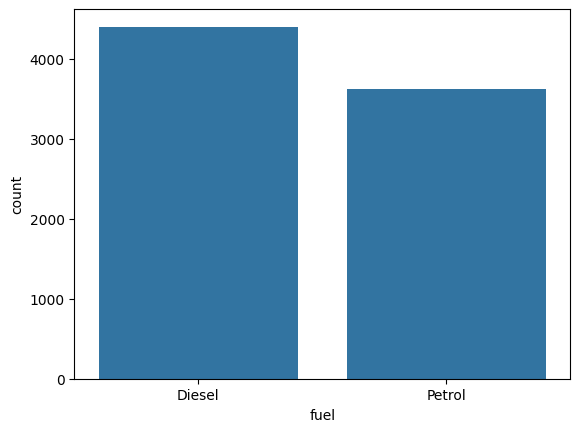

In [17]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

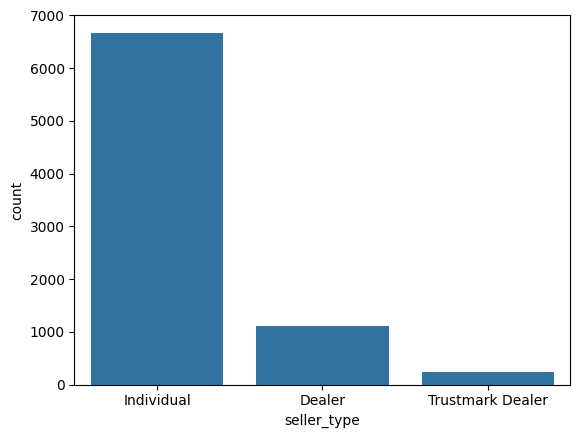

In [18]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

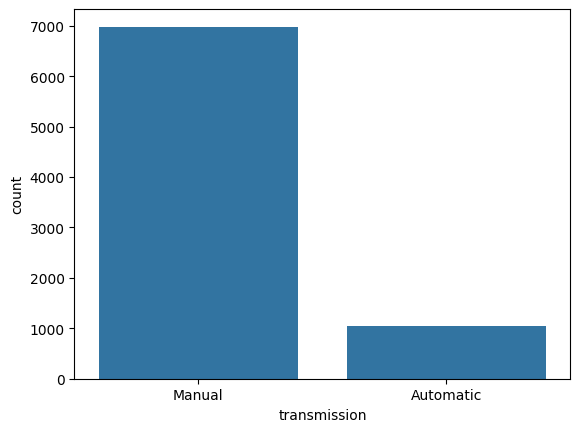

In [19]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

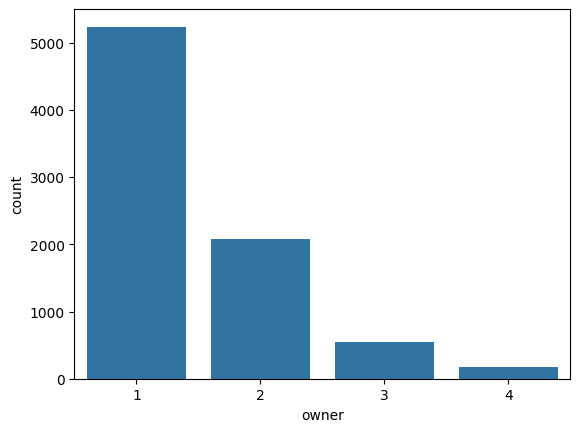

In [20]:
sns.countplot(data = df, x = 'owner')

# 2.2 Multivirate Analysis
To understand relationships and interactions between the target variable 'selling_price' and the variables, 'fuel', 'transmission', and 'owner', I will use the box plot to analyze the distributions and the outliers. For the continuous variables like 'year', 'km_driven', 'mileage', 'engine', and 'max_power', these columns will be analyzed with the use of scatter plots.

Text(0.5, 0, 'fuel')

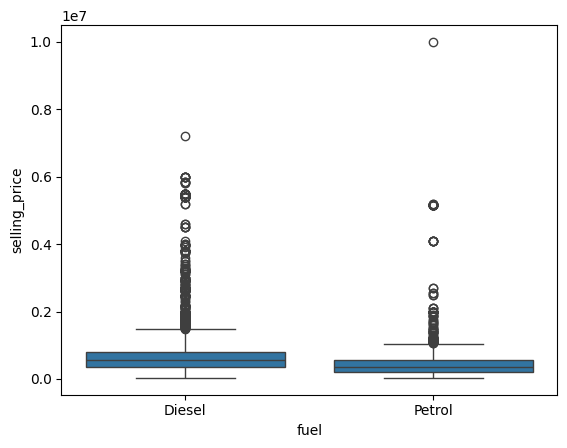

In [21]:
sns.boxplot(x = df['fuel'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'transmission')

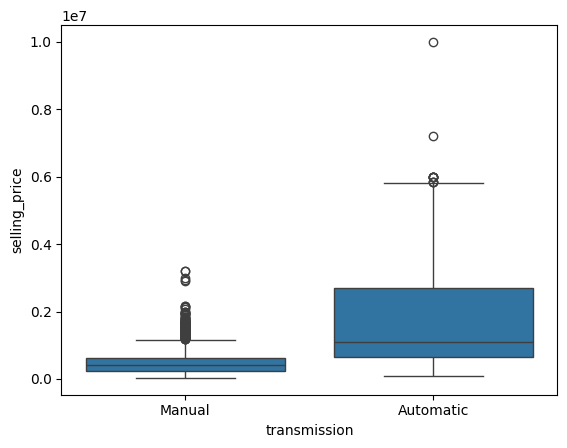

In [22]:
sns.boxplot(x = df['transmission'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("transmission")

Text(0.5, 0, 'owner')

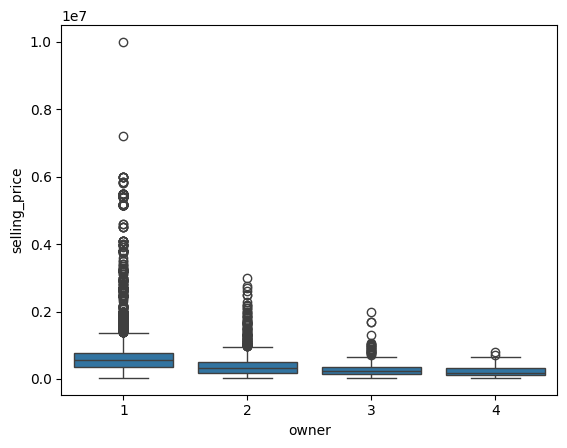

In [23]:
sns.boxplot(x = df['owner'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("owner")

<Axes: xlabel='year', ylabel='selling_price'>

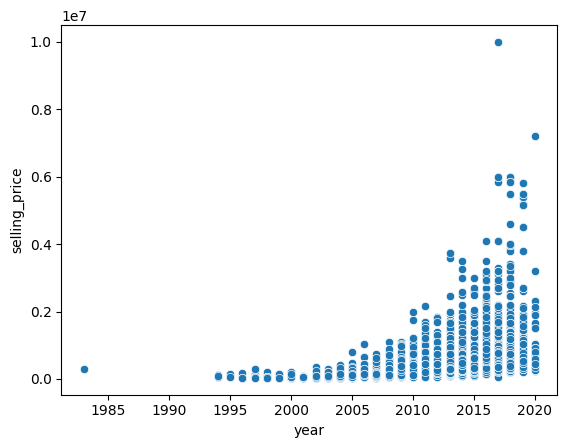

In [24]:
sns.scatterplot(x = df['year'] , y = df['selling_price'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

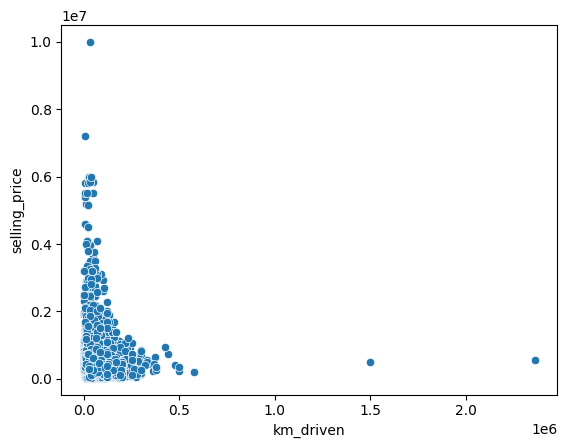

In [25]:
sns.scatterplot(x = df['km_driven'] , y = df['selling_price'])

<Axes: xlabel='mileage', ylabel='selling_price'>

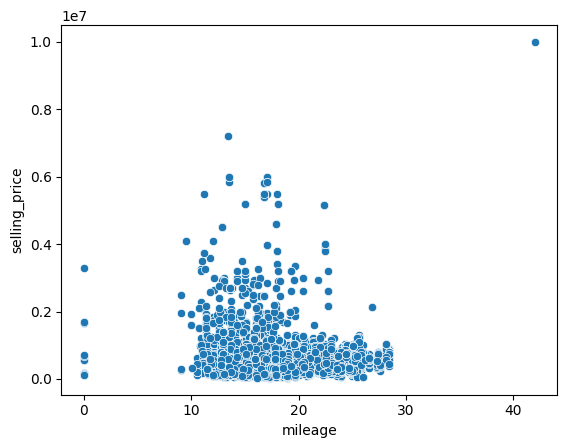

In [26]:
sns.scatterplot(x = df['mileage'] , y = df['selling_price'])

<Axes: xlabel='engine', ylabel='selling_price'>

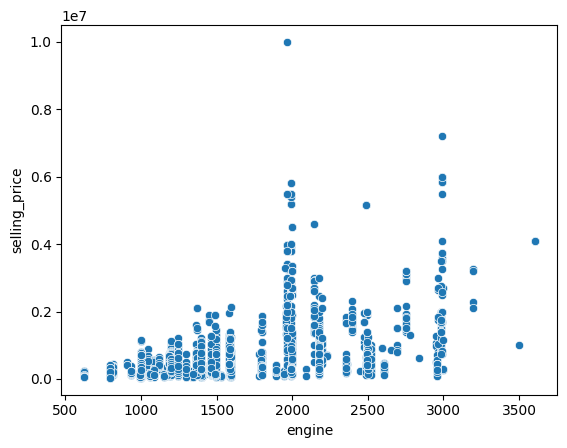

In [27]:
sns.scatterplot(x = df['engine'] , y = df['selling_price'])

<Axes: xlabel='max_power', ylabel='selling_price'>

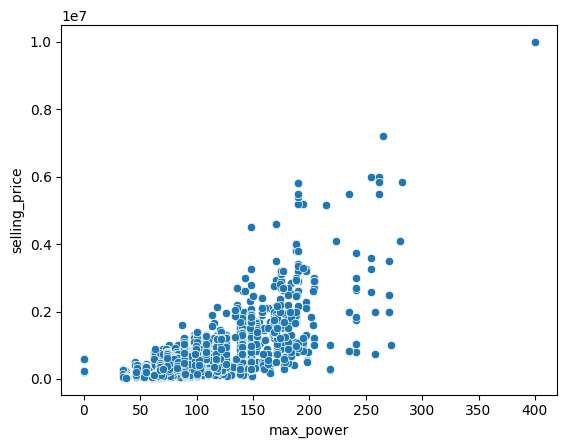

In [28]:
sns.scatterplot(x = df['max_power'] , y = df['selling_price'])

# 2.3 Correlation Matrix
In addition to the changes mentioned above, the 'name' column will be label encoded because the car brand name could signifincantly affect the sale price. The 'fuel', 'seller type', and 'trasmission' columns will also be encoded for the same reasons. This encoding is needed for exploring the data and creating the correlation matrix.

In [29]:
# Label encoding to convert the categorical data into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])

In [30]:
# Check to see what numbers are mapped to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [31]:
# Save the names and get the mapping of the classes
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
brand_mapping

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [32]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [33]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [34]:
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'].unique()

array([0, 1])

In [35]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [36]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [37]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [38]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [39]:
le.classes_

array([0, 1, 2])

In [40]:
# Applying log function to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

In [41]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.3 KB


<Axes: >

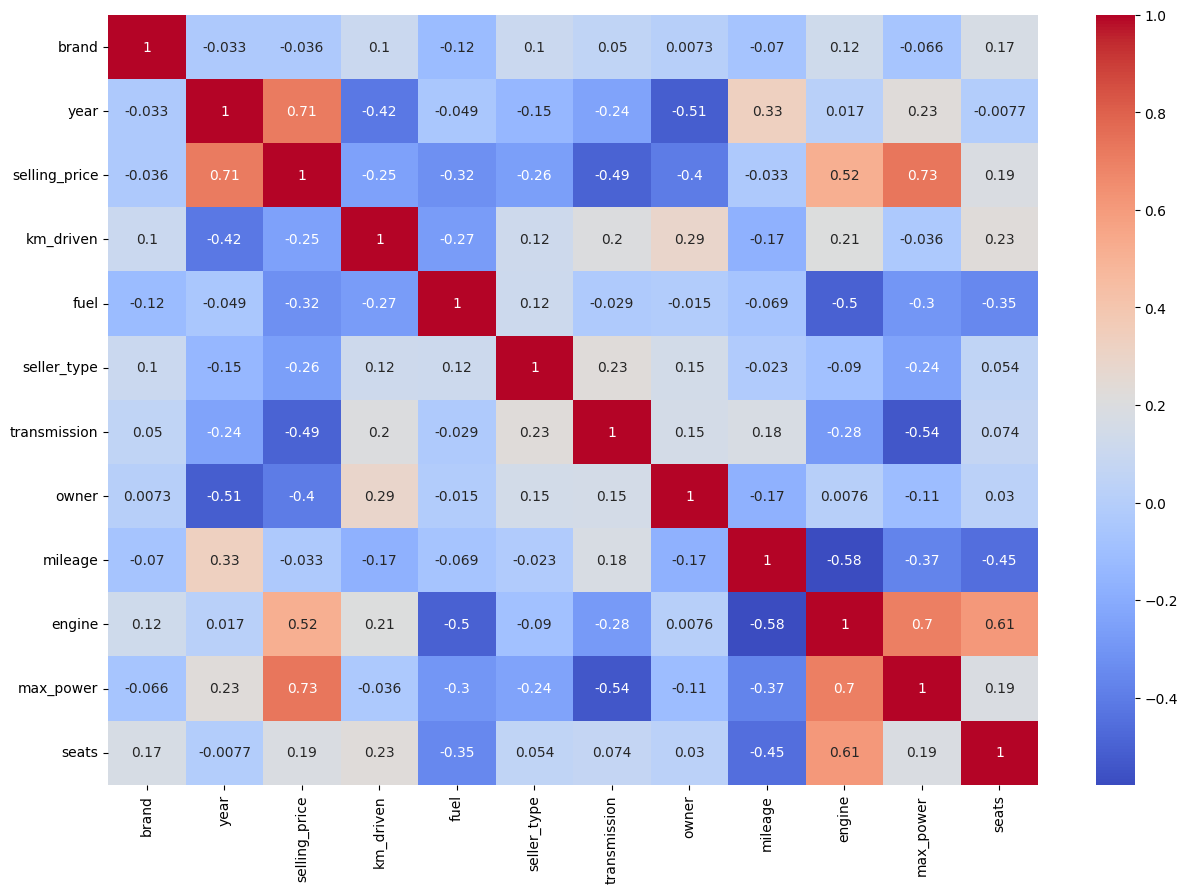

In [43]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

* According to this heatmap, we can conclude that the selling price of the cars are highly correlated to the years, max_power, and engine of the cars. These features will have an impact on the selling_price of the car. Since engine and max_power, engine and seats have a strong correlation, these all features cannot be used in our model. But one of them should be used as one of the features that are independent variables in our model.
* The heatmap also shows the negative relations between mileage and selling_price that can tell us that the more the mileage, the less the selling_price.
* Interpreting this heatmap can help us to choose which features are the best for our model.

# 2.4 Predictive Power Score
We use the predictive power score library to better understand how features are related to the target variable and to confirm our assumptions about their relationships.

<Axes: xlabel='x', ylabel='y'>

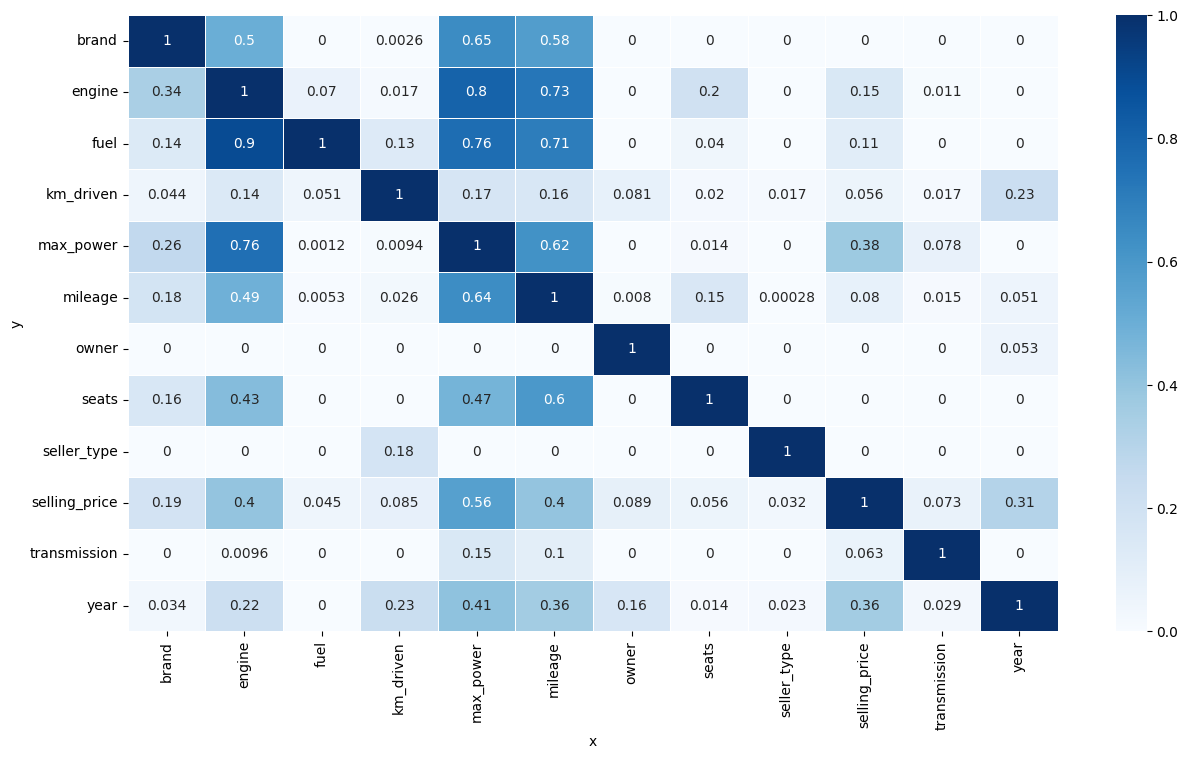

In [44]:
# Copy the data fram to advoid manipulating the original data frame
dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns= 'x', index= 'y', values= 'ppscore')

# Plot
plt.figure(figsize=(15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths= 0.5, annot= True)

# 4. Feature Engineering
We don't need to do the dimensionality reduction, feature splitting, and creating features in this data. So, we are going to skip this step.

# 5. Feature Selection
The features selected for the prediction of the target value are 'year', 'max_power', and 'mileage' because 'selling_price' will be effected on what year the car was produced, the highest poer output of the car, and how much kilometers per liter of fuel the car can drive.

In [45]:
X = df[['year', 'max_power', 'mileage']]
y = df['selling_price']

In [46]:
X.shape , y.shape

((8028, 3), (8028,))

In [47]:
type(X) , type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# 5.1 Test, Train and Split the Dataset

In [48]:
# shape of (m,n)
X = df[['year', 'max_power', 'mileage']]
assert len(X.shape) == 2  #unit test

#shape of (n,)
y = df['selling_price']
assert len(y.shape) == 1

In [49]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 50)

In [50]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [51]:
y_train.shape , y_test.shape

((6422,), (1606,))

# 5.2. Preprocessing

In [52]:
# Checking null values
X_train.isnull().sum()

year           0
max_power    162
mileage      166
dtype: int64

In [53]:
y_train.isnull().sum()

np.int64(0)

In [54]:
X_test.isnull().sum()

year          0
max_power    46
mileage      48
dtype: int64

In [55]:
y_test.isnull().sum()

np.int64(0)

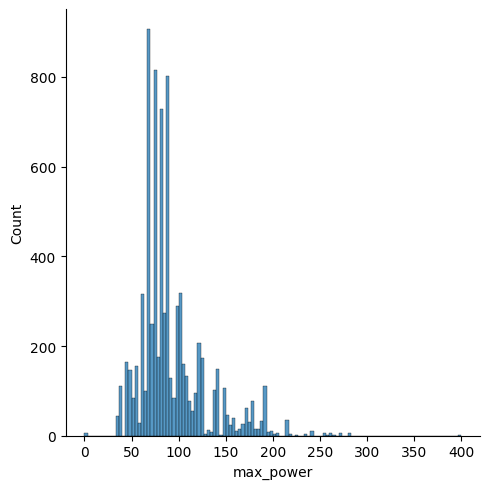

In [56]:
# Plot Distribution plot of max_power
sns.displot(data=df, x='max_power')

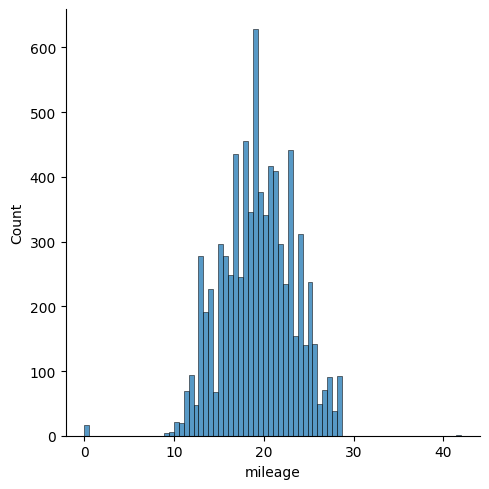

In [57]:
# Plot Distribution plot of mileage
sns.displot(data=df, x='mileage')

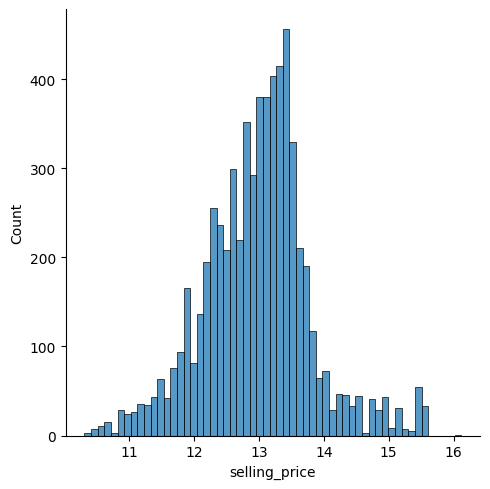

In [58]:
sns.displot(y_train)

In [59]:
# Saving values to put into model file
year_default = X_train['year'].median()
max_power_default = X_train['max_power'].mean()
mileage_default = X_train['mileage'].mean()

In [60]:
# Fill the mean and medium into null values in training set
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [61]:
# Fill the mean and medium into null values in test set
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [62]:
# Doing the same for targets
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [63]:
# Checking the null values
X_train[['year', 'mileage','max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [64]:
y_train.isna().sum()

np.int64(0)

In [65]:
y_test.isna().sum()

np.int64(0)

# 5.3. Checking and Handeling Outliers

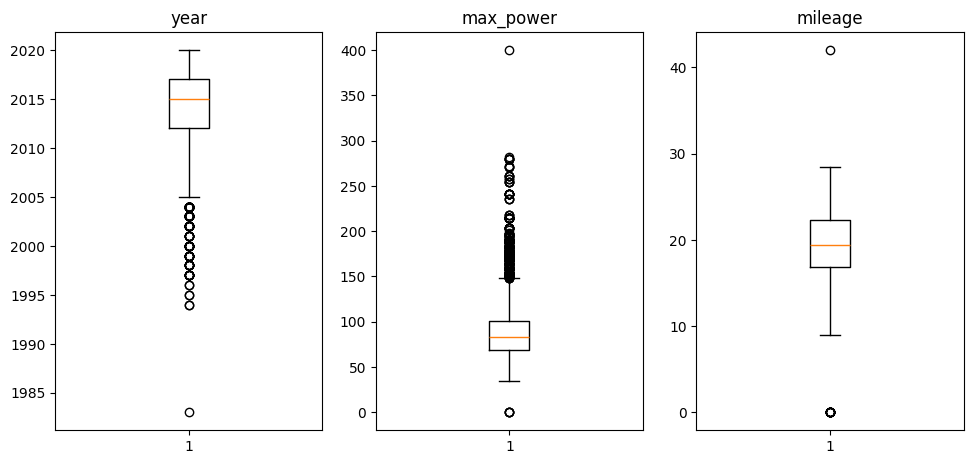

In [66]:
# Create a dictionary of columns.
col_dict = {'year':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [67]:
def outlier_count(col, data = X_train):
    
    # calculate 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate the inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+17*'*' + col + 17*'*'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [68]:
for col in X_train[['year', 'max_power','mileage']].columns:
    outlier_count(col)


*****************year*****************

Number of outliers: 174
Percent of data that is outlier: 2.71%

*****************max_power*****************

Number of outliers: 477
Percent of data that is outlier: 7.43%

*****************mileage*****************

Number of outliers: 16
Percent of data that is outlier: 0.25%


In [69]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


# 5.4. Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [71]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [72]:
# Because we need to access the using the index values for linear regression
# y_train = y_train.values
# y_train.values

In [73]:
# Adding intercepts to include a bias in our theta
# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [74]:
X_train.shape

(6422, 4)

# 6. Modeling

In [75]:
#experiment tracking
import mlflow
import os
import logging
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "phue"
#mlflow.create_experiment(name="car-price-prediction-ppt") , I first create my own experience and set it as the current experiment for next time.
mlflow.set_experiment(experiment_name="car-price-prediction-ppt")
logging.getLogger("mlflow").setLevel(logging.WARNING)

In [76]:
# from sklearn.preprocessing import PolynomialFeatures

# # The transform input features input to the given degree. e.g. feature x will become x^2 or x^3.
# class PolynomialFeatures:
#     def __init__(self, degree):
#         self.degree = degree
        
    
#     def fit_transform(self, X):
#         # Transform input features to include polynomial terms
#         X_poly = np.column_stack([X ** self.degree])
#         return X_poly

In [77]:
from sklearn.model_selection import KFold
from math import sqrt,isnan

class LinearRegression (object):
    #adding cross validation
    kfold = KFold(n_splits=3)

    def __init__(self, regularization, method, momentum, theta_init, lr, num_epochs=500, batch_size=50, cv=kfold):
        self.regularization = regularization
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.cv         = cv
        self.method     = method 
        self.momentum = momentum
        self.theta_init = theta_init
        self.theta = None
        self.prev_step = 0

    def mse(self, ytrue, ypred):
        mse = ((ypred - ytrue)**2).sum() / ytrue.shape[0]
        return mse
    
    def r2(self, ytrue, ypred):
        rersidual_variance = np.sum((ytrue - ypred)**2)
        total_variance = np.sum((ytrue - np.mean(ytrue))**2)
        r2 = 1- (rersidual_variance / total_variance)
        return r2
    
    def fit(self, X_train_class, y_train_class):
        y_train_class = np.array(y_train_class)
        #create a list of kfold score
        self.kfold_score = list()
        self.kfold_r2 = list()

        #reset val loss
        self.val_loss_old = np.inf

        #split the training set into 3 folds
        for fold, (train_idx , val_idx) in enumerate (self.cv.split(X_train_class)):
            X_cross_train = X_train_class[train_idx]
            y_cross_train = y_train_class[train_idx]
            X_cross_val = X_train_class[val_idx]
            y_cross_val = y_train_class[val_idx]

            #compute initial theta
            if self.theta_init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1]) 
            elif self.theta_init == 'xavier':
                m = X_cross_train.shape[0]
                sqrt_m = np.sqrt(m)
                #calculate the range for the weights
                lower, upper = -(1/sqrt_m), (1/sqrt_m)
                #randomly pick the weights within the range and generate random numbers of theta
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers*(upper-lower)

            prev_step = np.zeros_like(self.theta)

            #one epoch will be used for the entire training dataset
            with mlflow.start_run(run_name= f"Fold-{fold}", nested=True):
                for epoch in range(self.num_epochs):
                    #shuffle the indexes to ensure randomness
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    #Stochastic Gradient Descent
                    if self.method == 'sto':
                        for batch_indx in range (X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_indx].reshape(1,-1) #(11,)==>(1,11)==>(m,n)
                            y_method_train = y_cross_train[batch_indx].reshape(1,)
                            train_loss = self.train(X_method_train, y_method_train)

                    #Mini-batch Gradient Descent
                    elif self.method == 'mini':
                        for batch_indx in range(0,X_cross_train.shape[0], self.batch_size):
                            #batch_indx = 0,50,100,150,
                            X_method_train = X_cross_train[batch_indx : batch_indx+self.batch_size , : ]
                            y_method_train = y_cross_train[batch_indx : batch_indx+self.batch_size]
                            train_loss = self.train(X_method_train, y_method_train)
                    
                    #Batch Gradient Descent
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self.train(X_method_train, y_method_train)
                    
                    # Record training loss for each epoch in mlflow
                    mlflow.log_metric(key='train_loss', value=train_loss, step=epoch)

                    # Record validation loss for each epoch in mlflow
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key='val_loss', value=val_loss_new, step=epoch)

                    # Record r2 score for each epoch in mlflow
                    val_r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key='val_r2', value=val_r2, step=epoch)

                    # Early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new

                # Store the training losses and R2 scores for each fold into a array
                self.kfold_score.append(val_loss_new)
                self.kfold_r2.append(val_r2)
                print(f"Fold {fold} MSE: {val_loss_new}")
                print(f"Fold {fold} R2: {val_r2}")

    def train(self, X, y):
        m = X.shape[0]
        yhat = self.predict(X)
        grad = (1/m)* X.T @ (yhat - y) + self.regularization.derivation(self.theta) #calculating gradient
        # prev_step = 0 #memory of previous step
        step = self.lr * grad
        # Calculate the step
        if self.momentum == 'without':
            self.theta -= step
        else:
            self.theta = (self.theta - step) + self.momentum * self.prev_step

        self.prev_step = step
    
        # self.theta -= step  # Update theta with the step
        loss = self.mse(y, yhat)  # Calculate the loss
        return loss
        
    def predict(self,X):
        prediction = X @ self.theta #(m,n)*(n,)
        return prediction
    
    def _coef(self):
        return self.theta[1:] #theta is (w0, w1, w2, w3,.....wn), w0 is the bias or the intercept, ....wn are the weights / coefficients / theta
    
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_names = ['year','max_power', 'mileage']
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])] #[abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        #Plot the figure
        plt.figure(figsize=(10,5))
        plt.barh(feature_names, importance_values, color= 'blue')
        plt.xlabel('Feature Importance')
        plt.ylabel("Features")
        plt.title("Feature Importance based on Coefficients")
        plt.show()

In [78]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    
    
class Lasso(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = LassoPenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

class Ridge(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = RidgePenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

class Normal(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = NormalPenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

# 6.1. Experiment

In [79]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [90]:

polynomials = [0,1] #0 means no polynomial feature
regs = ["Ridge", "Lasso", "Normal"] #types of regularization
methods = ["sto", "mini", "batch"]
theta_methods = ["zero", "xavier"]
lrs = [0.01, 0.001, 0.0001]
momentums = ["without", 0.4]

for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for theta in theta_methods:
                for lr in lrs:
                    for momentum in momentums:
                        params = {"method": method, "theta_init": theta, "momentum": momentum, "lr": lr, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-theta-{params['theta_init']}-momentum-{params['momentum']}-lr-{params['lr']}-reg-{reg}", nested=True)
                
                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)

                                                
                        # #######

                        # Create the model
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)  

                        if polynomials == 1:
                            poly = PolynomialFeatures(degree=2, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        else:
                            X_train_poly , X_test_poly = X_train , X_test

                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        # Log the model
                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######
                        
                        mlflow.end_run()

===== 0 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====
Fold 0 MSE: 4.914244210792751
Fold 0 R2: -6.321318004104852
Fold 1 MSE: 4.673071176761341
Fold 1 R2: -5.8437215639762625
Fold 2 MSE: 4.654696372241129
Fold 2 R2: -5.529109130443123
Train MSE:  4.665473716311053
Train R2:  -5.767965492077757
Test MSE:  4.646220356293598
Test R2:  -5.1646987490260345
===== 0 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== 0.4 =====
Fold 0 MSE: 4.796758528470628
Fold 0 R2: -6.146285994234355
Fold 1 MSE: 4.69941133754041
Fold 1 R2: -5.882296779183502
Fold 2 MSE: 4.822563197907278
Fold 2 R2: -5.764574719711548
Train MSE:  4.834169352049231
Train R2:  -6.0126836730737185
Test MSE:  4.786805901129259
Test R2:  -5.351230481470792
===== 0 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== without =====
Fold 0 MSE: 4.8324889434067115
Fold 0 R2: -6.199517726102946
Fold 1 MSE: 4.795546604710598
Fold 1 R2: -6.023087059516275
Fold 2 MSE: 4.78299822403779


# 7. Testing

In [81]:
polynomials = [1] #0 means no polynomial feature
regs = ["Normal"] #types of regularization
methods = ["sto"]
theta_methods = ["zero"]
lrs = [0.0001]
momentums = [0.4]

for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for theta in theta_methods:
                for lr in lrs:
                    for momentum in momentums:
                        params = {"method": method, "theta_init": theta, "momentum": momentum, "lr": lr, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-theta-{params['theta_init']}-momentum-{params['momentum']}-lr-{params['lr']}-reg-{reg}", nested=True)
                
                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)

                                                
                        # #######

                        # Create the model
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)  

                        if polynomials == 1:
                            poly = PolynomialFeatures(degree=2, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        else:
                            X_train_poly , X_test_poly = X_train , X_test

                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        # Log the model
                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######
                        
                        mlflow.end_run()

===== 1 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====
Fold 0 MSE: 0.11589856944416298
Fold 0 R2: 0.8273324957563181
Fold 1 MSE: 0.11833765163055639
Fold 1 R2: 0.8266942856933698
Fold 2 MSE: 0.11400627404391542
Fold 2 R2: 0.8400842191926824
Train MSE:  0.11576928173623198
Train R2:  0.8320593895762058
Test MSE:  0.12359996230786226
Test R2:  0.8360050805625641


In [82]:
# Apply model on testing set.
yhat = model.predict(X_test)
mse = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)

print("Test MSE: ", mse)
print("Test R2: ", r2)

Test MSE:  0.12359996230786226
Test R2:  0.8360050805625641


# 8. Analysis  

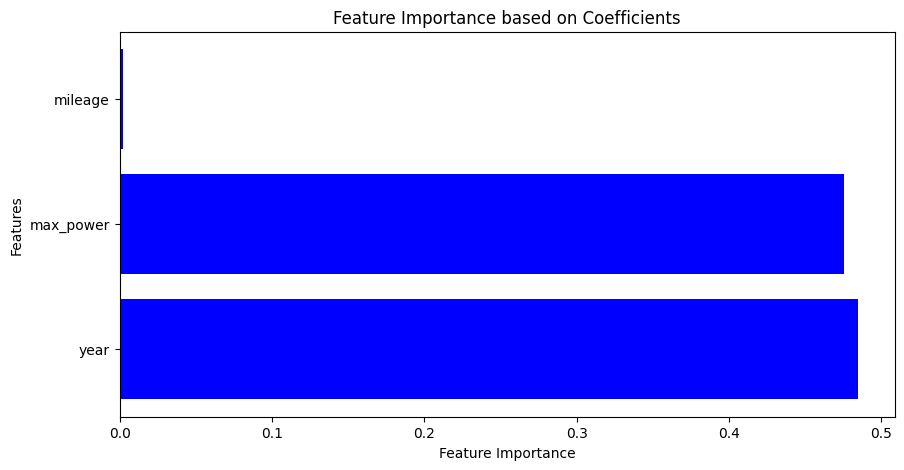

In [83]:
# Feature importance graph by calling the custom method from the LinearRegression class
model.feature_importance()

# 9. Inference

In [84]:
# Save the model,scaler and values together
model_zip = {
    'model': model,
    'scaler': scaler,
    'year_default' : year_default,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
}

In [86]:
import pickle

# Save the model to disk
filename = 'car_selling_price_a2.model'
pickle.dump(model_zip, open(filename, 'wb'))

In [87]:
# Try to create the example from the dataset
df[ ['year', 'max_power', 'mileage']].loc[1]

year         2014.00
max_power     103.52
mileage        21.14
Name: 1, dtype: float64

In [88]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[1])

np.float64(370000.0000000001)

In [89]:
# Create array of sample data

[year, max_power, mileage]  = scaler.transform([[2014,103.52,21.14]])[0]
sample = np.array([[year, max_power, mileage]])  
intercept = np.ones((1, 1))
sample   = np.concatenate((intercept, sample), axis=1)

# Predict the selling price
predicted_price = model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([519902.57685953])

# Assignment Report
As we can see from the logs of MLFlow, the model with parameters of polynomial features, noraml regularization, stocastic method, with theta zero, with momentum, and learning rate of 0.001 is the best model with lowest mse and highest r2 scores. According to the top twenty logs, the top models are all with Noraml regularization and stocastic and mini batch methods. So, in our problem, no other regulariztion methods cannot give the best prediction compare to Linear Regression (Normal).

![Best mse and r2 score](ML_Flow_1.png)

![Best MSE and R2 Score](ML_Flow_2.png)

This is the worst models according to highest mse and lowest r2 score got from ml flow. We can see that Lasso regularization and batch gradient descent methods give the worst performance.

![Worst Models](ML_Flow_3_LowestMSE.png)